# Exemplo de notebook

Este notebook mostra como fazer as seguintes tarefas:

1. Montar um circuito básico para gerar um dos estados de Bell
2. Mostrar o circuito
3. Simular e fazer o histograma da distribuição de probabilidades
4. Rodar nos computadores quânticos da IBM (ibmqx2, ibmqx4 e ibmq_16_melbourne)

**Atenção:** Para executar cada comando é necessário pressionar SHIFT-ENTER (o cursor deve estar na caixa correspondente). Para mais detalhes, pressionar ESC-h.


In [1]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram

In [2]:
### Montagem do circuito do estado GHZ de n qubits
n = 5 # número de qubits
q = QuantumRegister(n)
c = ClassicalRegister(n)
circuito = QuantumCircuit(q, c)
circuito.h(q[0])
for i in range(1,n):
    circuito.cx(q[i-1], q[i])
circuito.barrier()
circuito.measure(q,c)

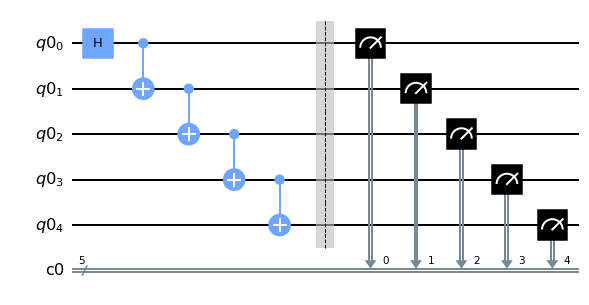

In [3]:
circuito.draw(output='mpl')
#circuito.draw(output='latex')  # segunda opção para visualizar o circuito
#print(circuito)  # terceira opção para visualizar o circuito

In [4]:
## comando para gerar o código QASM do circuito
# print(circuito.qasm())

In [5]:
### Comandos para simular a saída do circuito
simulador = BasicAer.get_backend('qasm_simulator')
job1 = execute(circuito, simulador, shots=1024)
resultado1 = job1.result()
contagem1 = resultado1.get_counts()
print(contagem1)

{'11111': 530, '00000': 494}


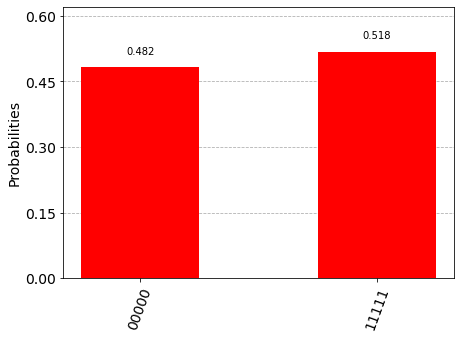

In [6]:
plot_histogram(contagem1,color='red')

In [7]:

### Este comando deve ser usado uma única vez, pois o valor do token ficará gravado so seu laptop.
### Vá na página do IBM Q Experience, clique no seu usuário (boneco no alto a direita) para entrar na sua conta. 
### Copie o 'API Token' e cole no comando abaixo.
#from qiskit import IBMQ
#IBMQ.save_account('')

In [8]:
### Este comando só vai funcionar se você conseguiu ter sucesso no comando anterior.
### Este comando deve ser dado toda vez que abrir este notebook
from qiskit import IBMQ
provedor = IBMQ.load_account()

In [9]:
### Lista das máquinas disponíveis e o número de jobs na fila. 
print('name',' '*25,'operational','   ', 'pending_jobs')
print(' ')
for backend in provedor.backends():
    name = backend.name()
    print(name,' '*(35-len(name)),backend.status().operational,'  ',backend.status().pending_jobs)

name                           operational     pending_jobs
 
ibmq_qasm_simulator                  True    3
ibmq_armonk                          True    1
ibmq_santiago                        False    2031
ibmq_bogota                          True    80
ibmq_lima                            True    79
ibmq_belem                           True    26
ibmq_quito                           True    24
simulator_statevector                True    3
simulator_mps                        True    3
simulator_extended_stabilizer        True    3
simulator_stabilizer                 True    3
ibmq_manila                          True    371


In [10]:
### O comando get_backend seleciona o backend
### O comando execute executa o circuito no backend escolhido
### O job entra na fila. A espera pode demorar MUITAS HORAS.
### O comando job_monitor mostra a posição em tempo real.
### Se a conexão com a internet for interrompida, o job é cancelado.
maquina = provedor.get_backend('ibmq_belem')
job2 = execute(circuito, maquina, shots=1024)
job_monitor(job2)
resultado2 = job2.result()
contagem2 = resultado2.get_counts()
print(contagem2)

Job Status: job has successfully run
{'00000': 351, '00001': 11, '10000': 23, '10001': 1, '10010': 3, '10011': 5, '10100': 11, '10101': 2, '10110': 2, '10111': 17, '11000': 17, '11001': 22, '11010': 3, '11011': 55, '11100': 22, '11101': 62, '11110': 29, '11111': 233, '00010': 5, '00011': 11, '00100': 18, '00101': 7, '00110': 6, '00111': 22, '01000': 6, '01001': 4, '01010': 2, '01011': 13, '01100': 12, '01101': 6, '01110': 5, '01111': 38}


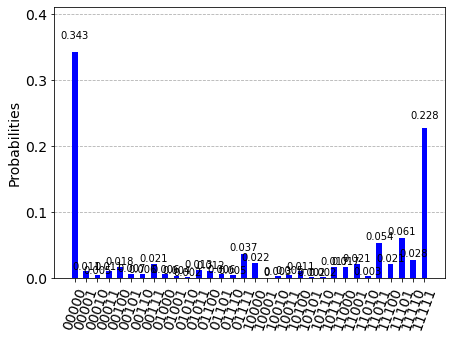

In [11]:
plot_histogram(contagem2,color='blue')

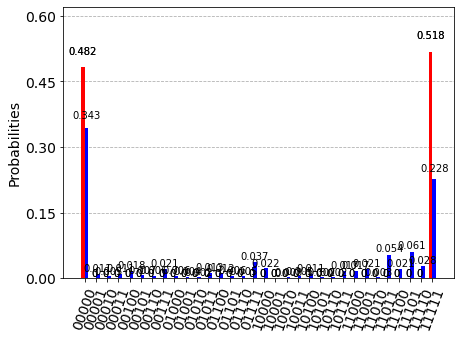

In [12]:
plot_histogram([contagem1,contagem2],color=['red','blue'])